In [74]:
import sys
sys.path.append('..')
from utilities.get_data import get_historical_from_db
import pandas as pd 
import ccxt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import math
from binance.client import Client

In [75]:
client = Client(tld='us')

klinesT = client.get_historical_klines("ETHUSDT", Client.KLINE_INTERVAL_4HOUR, "01 October 2020", '2022-06-15')

df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

In [76]:
df["return_pct"] = df["close"].pct_change() * 100
df["abs_return"] = abs(df["return_pct"])
df["abs_return_round"] = df["abs_return"].round(1)
df["evol_1"] = ((df["close"].rolling(1).mean().shift(-1) - df["close"]) / df["close"] * 100)
df["evol_3"] = ((df["close"].rolling(3).mean().shift(-3) - df["close"]) / df["close"] * 100)
df["evol_5"] = (df["close"].rolling(5).mean().shift(-5) - df["close"]) / df["close"] * 100
df["evol_10"] = (df["close"].rolling(10).mean().shift(-10) - df["close"]) / df["close"] * 100
df["evol_20"] = (df["close"].rolling(20).mean().shift(-20) - df["close"]) / df["close"] * 100
df["evol_50"] = (df["close"].rolling(50).mean().shift(-50) - df["close"]) / df["close"] * 100

evol_top10 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.1*len(df)):].iloc[0]
evol_top5 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.05*len(df)):].iloc[0]
evol_top1 = df["abs_return"].fillna(0).sort_values().iloc[int(-0.01*len(df)):].iloc[0]
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,ignore,return_pct,abs_return,abs_return_round,evol_1,evol_3,evol_5,evol_10,evol_20,evol_50
0,1601510400000,359.77,363.44,358.99,362.96,244.80951000,1601524799999,88768.07499870,131,62.54603000,...,0,NaN,NaN,NaN,0.140511,0.375615,-0.915252,-3.119076,-3.720933,-4.116872
1,1601524800000,363.36,363.81,360.22,363.47,957.11564000,1601539199999,347906.31527580,307,29.12094000,...,0,0.140511,0.140511,0.1,1.207803,-0.753845,-1.711283,-3.752717,-4.086857,-4.242276
2,1601539200000,364.14,368.92,363.59,367.86,55.26582000,1601553599999,20271.99354140,68,32.19561000,...,0,1.207803,1.207803,1.2,-1.690861,-3.327353,-4.291850,-5.434404,-5.435356,-5.413907
3,1601553600000,368.89,368.89,361.22,361.64,142.97014000,1601567999999,52274.46248930,83,35.45036000,...,0,-1.690861,1.690861,1.7,-2.474837,-2.596505,-3.968588,-4.221602,-3.933331,-3.763688
4,1601568000000,360.76,360.76,345.86,352.69,425.37798000,1601582399999,149747.49589930,411,226.09635000,...,0,-2.474837,2.474837,2.5,-0.045366,-1.137921,-2.069806,-1.934844,-1.512943,-1.189373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,1655193600000,1241.19,1243.85,1155.52,1174.22,4607.18940000,1655207999999,5479038.21292270,4179,2386.11799000,...,0,-5.335376,5.335376,5.3,6.549028,4.052052,NaN,NaN,NaN,NaN
3728,1655208000000,1175.44,1258.14,1158.29,1251.12,3304.64978000,1655222399999,4001763.44368170,4515,1659.65985000,...,0,6.549028,6.549028,6.5,-3.505659,-4.438690,NaN,NaN,NaN,NaN
3729,1655222400000,1250.36,1266.73,1195.25,1207.26,1492.55048000,1655236799999,1832857.92452330,2022,726.53966000,...,0,-3.505659,3.505659,3.5,-0.019880,NaN,NaN,NaN,NaN,NaN
3730,1655236800000,1207.26,1220.70,1161.31,1207.02,825.81353000,1655251199999,983463.21092690,1332,417.82341000,...,0,-0.019880,0.019880,0.0,-2.861593,NaN,NaN,NaN,NaN,NaN


In [77]:
print(round(df["evol_1"].mean(), 2), "%")
print(round(df["evol_3"].mean(), 2), "%")
print(round(df["evol_5"].mean(), 2), "%")
print(round(df["evol_10"].mean(), 2), "%")
print(round(df["evol_20"].mean(), 2), "%")
print(round(df["evol_50"].mean(), 2), "%")

0.05 %
0.11 %
0.16 %
0.3 %
0.61 %
1.64 %


In [78]:
print("- Evolution after a top 10% return candle (+/-"+str(round(evol_top10,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top10])) +" candles) -\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top10]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top10]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top10]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top10]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top10]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top10]["evol_50"].mean(),2), "%")
print("\n")
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top10]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top10]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top10]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top10]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top10]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top10]["evol_50"].mean(),2), "%")

- Evolution after a top 10% return candle (+/-3.36%) (195 candles) -

Mean evolution (+) after 1 period: 0.04 %
Mean evolution (+) after 3 period: 0.18 %
Mean evolution (+) after 5 period: 0.28 %
Mean evolution (+) after 10 period: 0.42 %
Mean evolution (+) after 20 period: 1.04 %
Mean evolution (+) after 50 period: 2.6 %


Mean evolution (-) after 1 period: 0.29 %
Mean evolution (-) after 3 period: 0.35 %
Mean evolution (-) after 5 period: 0.44 %
Mean evolution (-) after 10 period: 0.76 %
Mean evolution (-) after 20 period: 1.21 %
Mean evolution (-) after 50 period: 2.95 %


In [79]:
print("- Evolution after a top 5% return candle (+/-"+str(round(evol_top5,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top5])) +" candles) -\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top5]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top5]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top5]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top5]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top5]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top5]["evol_50"].mean(),2), "%")
print("\n")
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top5]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top5]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top5]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top5]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top5]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top5]["evol_50"].mean(),2), "%")

- Evolution after a top 5% return candle (+/-4.5%) (91 candles) -

Mean evolution (+) after 1 period: 0.04 %
Mean evolution (+) after 3 period: 0.4 %
Mean evolution (+) after 5 period: 0.48 %
Mean evolution (+) after 10 period: 0.75 %
Mean evolution (+) after 20 period: 1.48 %
Mean evolution (+) after 50 period: 3.13 %


Mean evolution (-) after 1 period: 0.51 %
Mean evolution (-) after 3 period: 0.54 %
Mean evolution (-) after 5 period: 0.74 %
Mean evolution (-) after 10 period: 1.22 %
Mean evolution (-) after 20 period: 1.63 %
Mean evolution (-) after 50 period: 3.09 %


In [80]:
print("- Evolution after a top 1% return candle (+/-"+str(round(evol_top1,2))+"%) ("+ str(len(df[df["return_pct"] > evol_top1])) +" candles) -\n")
print("Mean evolution (+) after 1 period:", round(df[df["return_pct"] > evol_top1]["evol_1"].mean(),2), "%")
print("Mean evolution (+) after 3 period:", round(df[df["return_pct"] > evol_top1]["evol_3"].mean(),2), "%")
print("Mean evolution (+) after 5 period:", round(df[df["return_pct"] > evol_top1]["evol_5"].mean(),2), "%")
print("Mean evolution (+) after 10 period:", round(df[df["return_pct"] > evol_top1]["evol_10"].mean(),2), "%")
print("Mean evolution (+) after 20 period:", round(df[df["return_pct"] > evol_top1]["evol_20"].mean(),2), "%")
print("Mean evolution (+) after 50 period:", round(df[df["return_pct"] > evol_top1]["evol_50"].mean(),2), "%")
print("\n")
print("Mean evolution (-) after 1 period:", round(df[df["return_pct"] < -evol_top1]["evol_1"].mean(),2), "%")
print("Mean evolution (-) after 3 period:", round(df[df["return_pct"] < -evol_top1]["evol_3"].mean(),2), "%")
print("Mean evolution (-) after 5 period:", round(df[df["return_pct"] < -evol_top1]["evol_5"].mean(),2), "%")
print("Mean evolution (-) after 10 period:", round(df[df["return_pct"] < -evol_top1]["evol_10"].mean(),2), "%")
print("Mean evolution (-) after 20 period:", round(df[df["return_pct"] < -evol_top1]["evol_20"].mean(),2), "%")
print("Mean evolution (-) after 50 period:", round(df[df["return_pct"] < -evol_top1]["evol_50"].mean(),2), "%")

- Evolution after a top 1% return candle (+/-7.11%) (17 candles) -

Mean evolution (+) after 1 period: -0.07 %
Mean evolution (+) after 3 period: 1.07 %
Mean evolution (+) after 5 period: 1.53 %
Mean evolution (+) after 10 period: 0.99 %
Mean evolution (+) after 20 period: 0.06 %
Mean evolution (+) after 50 period: 2.4 %


Mean evolution (-) after 1 period: 2.69 %
Mean evolution (-) after 3 period: 2.89 %
Mean evolution (-) after 5 period: 3.71 %
Mean evolution (-) after 10 period: 4.6 %
Mean evolution (-) after 20 period: 4.4 %
Mean evolution (-) after 50 period: 5.42 %


In [81]:
wallet = 1000
for i in range(int(365*24/100)):
    wallet += 0.0057 * wallet 
    
wallet

1639.66513127828

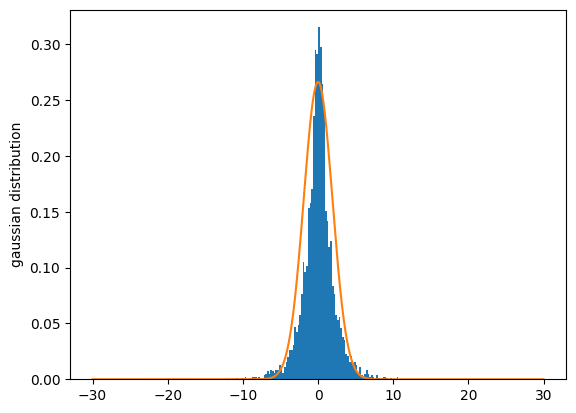

In [82]:
ax, ay, _ = plt.hist(df["return_pct"], bins=100, density=True, stacked=True)
mean = 0; std = (df["return_pct"].std())/4; variance = np.square(std)
x = np.arange(-30,30,.01)
f = 0.35*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

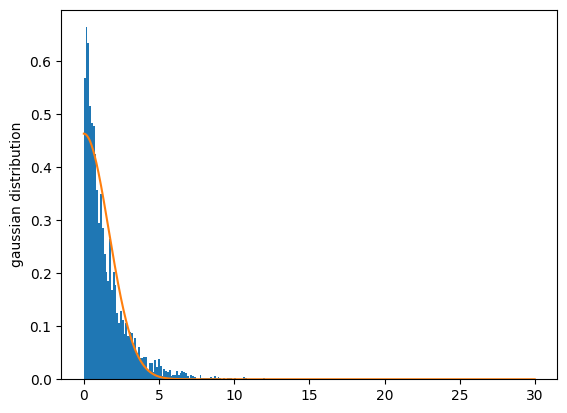

In [83]:
ax, ay, _ = plt.hist(df["abs_return"], bins=100, density=True, stacked=True)
mean = 0; std = (df["abs_return"].std())/2.5; variance = np.square(std)
x = np.arange(0,30,.01)
f = 0.7*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()

<Axes: >

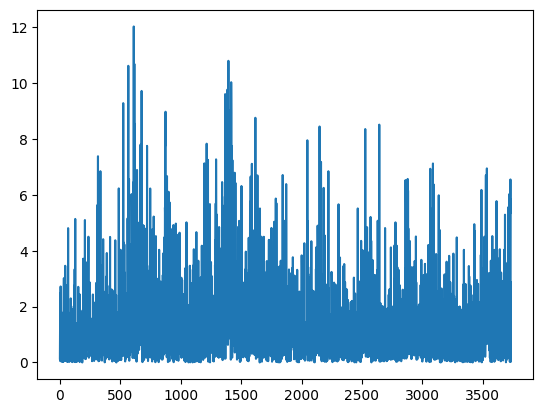

In [84]:
df["abs_return"].plot()

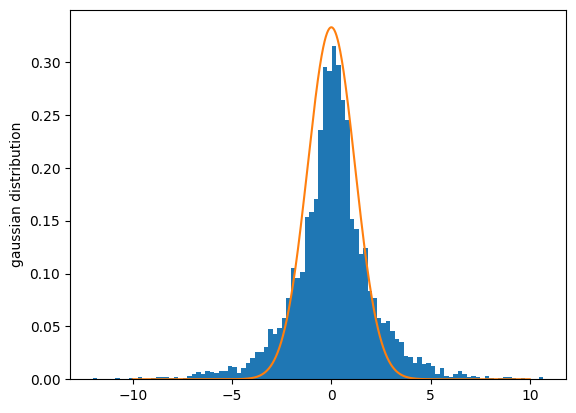

In [85]:
ax, ay, _ = plt.hist(df["return_pct"], bins=100, density=True, stacked=True)
mean = 0; std = (df["return_pct"].std())/2.5; variance = np.square(std)
x = np.arange(-10,10,.01)
f = 0.7*np.exp(-np.square(x-mean)/2*variance)/(np.sqrt(2*np.pi*variance))

plt.plot(x,f)
plt.ylabel('gaussian distribution')
plt.show()